<a href="https://colab.research.google.com/github/moshekranc-git/pythonplayground/blob/master/UnbalancedClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://mc.ai/imbalanced-classification-with-the-adult-income-dataset/

https://yanhan.github.io/posts/2017-02-15-analysis-of-the-adult-data-set-from-uci-machine-learning-repository.ipynb.html

data file: colab/adult-all-cleaned.csv

In [0]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from collections import Counter
from numpy import hstack
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt

(45222, 15)
Age                           int64
Workclass                    object
Final Weight                  int64
Education                    object
Education Number of Years     int64
Marital-status               object
Occupation                   object
Relationship                 object
Race                         object
Sex                          object
Capital-gain                  int64
Capital-loss                  int64
Hours-per-week                int64
Native-country               object
income>50K                    int64
dtype: object
(45222, 15)
   Age         Workclass  ...  Native-country income>50K
0   39         State-gov  ...   United-States          0
1   50  Self-emp-not-inc  ...   United-States          0
2   38           Private  ...   United-States          0
3   53           Private  ...   United-States          0
4   28           Private  ...            Cuba          0

[5 rows x 15 columns]
Class=0, Count=34014, Percentage=75.216%
Class=1, Count=1

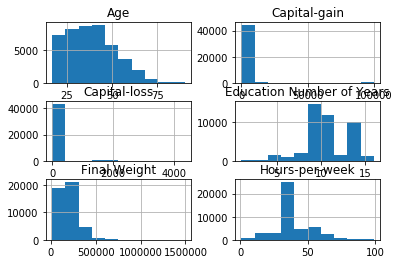

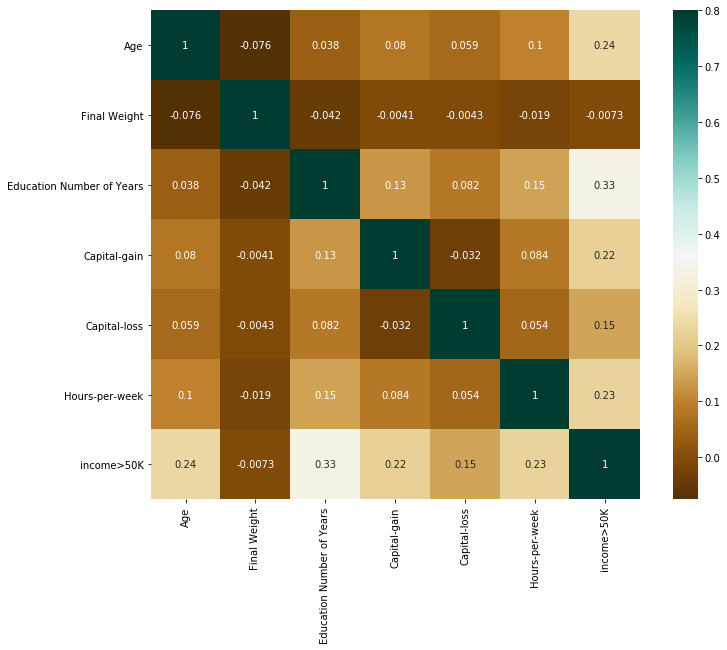

In [46]:
# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy dataframe
  # moshe - there should be no missing values - the data was already cleaned
  dataframe = read_csv(full_path, header=0, na_values='?')
  print(dataframe.shape)
  print(dataframe.dtypes)
 
  # drop rows with missing data 
  # moshe - there should be none - the data was already cleaned
  dataframe = dataframe.dropna()
  
  # summarize the shape of the dataset
  print(dataframe.shape)
  print(dataframe.head())
  dataframe.describe()
  
  # summarize the class distribution
  target = dataframe.values[:,-1]
  counter = Counter(target)
  for k,v in counter.items():
	  per = v / len(target) * 100
	  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
	
  # split into inputs and outputs
  X, y = dataframe.drop('income>50K', axis=1), dataframe['income>50K']
	
  # select categorical and numerical features
  cat_ix = X.select_dtypes(include=['object', 'bool']).columns
  num_ix = X.select_dtypes(include=['number', 'int64', 'float64']).columns
  print('cat_ix=', cat_ix, '\n')
  print('num_ix=', num_ix, '\n')

  # select a subset of the dataframe with the chosen columns
  subset = dataframe[num_ix]
  # create a histogram plot of each numeric variable
  subset.hist()
  pyplot.show()

  hmap = dataframe.corr()
  plt.subplots(figsize=(12, 9))
  sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

  # label encode the target variable to have the classes 0 and 1
  # moshe - no need to do this - already converted to 0/1
  y = LabelEncoder().fit_transform(y)

  return X.values, y, cat_ix, num_ix
 

# define the location of the dataset
full_path = 'adult-all-cleaned2.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)


In [0]:
# define models to test
def get_models():
	models, names = list(), list()
	# CART
	models.append(DecisionTreeClassifier())
	names.append('CART')
	# SVM
	models.append(SVC(gamma='scale'))
	names.append('SVM')
	# Bagging
	models.append(BaggingClassifier(n_estimators=100))
	names.append('BAG')
	# RF
	models.append(RandomForestClassifier(n_estimators=100))
	names.append('RF')
	# GBM
	models.append(GradientBoostingClassifier(n_estimators=100))
	names.append('GBM')
	return models, names

In [0]:
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  print(model, ':', scores)
  return scores
 

In [39]:
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

# define the reference model
model = DummyClassifier(strategy='most_frequent')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

(45222, 14) (45222,) Counter({0: 34014, 1: 11208})
DummyClassifier(constant=None, random_state=None, strategy='most_frequent') : [0.75215565 0.75215565 0.75232198 0.75232198 0.75210084 0.75210084
 0.75210084 0.75210084 0.75210084 0.75210084 0.75215565 0.75215565
 0.75232198 0.75232198 0.75210084 0.75210084 0.75210084 0.75210084
 0.75210084 0.75210084 0.75215565 0.75215565 0.75232198 0.75232198
 0.75210084 0.75210084 0.75210084 0.75210084 0.75210084 0.75210084]
Mean Accuracy: 0.752 (0.000)


Pipeline(memory=None,
         steps=[('t',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('c',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  Index(['Workclass', 'Education', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native-...
      dtype='object'))],
                                   verbose=False)),
                ('m',
                 DecisionTreeClas

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


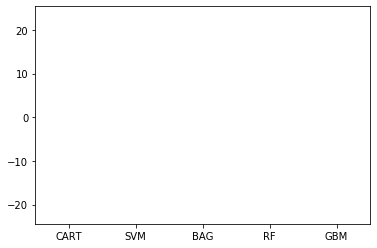

In [40]:
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
  # define steps
  steps = [('c',OneHotEncoder(handle_unknown='ignore'),cat_ix), ('n',MinMaxScaler(),num_ix)]
  # one hot encode categorical, normalize numerical
  ct = ColumnTransformer(steps)
  # wrap the model in a pipeline
  pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
  # evaluate the model and store results
  scores = evaluate_model(X, y, pipeline)
  results.append(scores)
  # summarize performance
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()